## Preamble

In [5]:
import os
os.chdir('/nfs/slac/g/ki/ki19/deuce/AEGIS/ismael/WeakLensingDeblending/')

In [6]:
import pickle 
import numpy as np
import matplotlib.pyplot as plt

In [7]:
import mycode.tomo.tomo_fncs as tomo_fncs
import mycode.errors as errors

In [8]:
from importlib import reload
reload(tomo_fncs)
reload(errors)

<module 'mycode.errors' from '/nfs/slac/g/ki/ki19/deuce/AEGIS/ismael/WeakLensingDeblending/mycode/errors.py'>

In [9]:
scat = pickle.load(open('mycode/tomo/project1/selection_cats1.p', 'rb') ,encoding='latin1')

In [15]:
tomos = np.linspace(0.2, 1.2, 6)
print(tomos)

[0.2 0.4 0.6 0.8 1.  1.2]


## Sanity Checks

In [20]:
tomo_cats = pickle.load(open('mycode/tomo/project1/tomo_cats.p', 'rb') ,encoding='latin1')

In [19]:
bootstrap_selection_cats = errors.bootstrap_zero_cats(scat)

In [29]:
bcats = bootstrap_selection_cats

In [28]:
print(len(bcat[4]))
print(len(set(bcat[4]['db_id'])))
print(len(scat[4]))

118946
75277
118946


In [79]:
bcat = pickle.load(open('mycode/tomo/project1/boot1/boot_cats0.p', 'rb') ,encoding='latin1')

In [30]:
tomos = np.linspace(0.2, 1.2, 6)
print(tomos)

[0.2 0.4 0.6 0.8 1.  1.2]


In [31]:
btomo_cats = tomo_fncs.get_tomographic_cats(bcats, tomos)

In [85]:
len(btomo_cats)

6

In [34]:
btomo_errs = tomo_fncs.get_tomo_errs(btomo_cats, 10)

just to check that symmetry is respected print both percentiles: [1.51004464e-06 1.84551245e-06]
just to check that symmetry is respected print both percentiles: [2.36053786e-06 8.38296819e-07]
just to check that symmetry is respected print both percentiles: [1.50620318e-06 1.29572077e-07]
just to check that symmetry is respected print both percentiles: [4.01365476e-07 3.40970735e-07]
just to check that symmetry is respected print both percentiles: [1.29701688e-07 3.70712179e-07]
just to check that symmetry is respected print both percentiles: [5.06323317e-07 4.97648803e-07]
just to check that symmetry is respected print both percentiles: [6.95442477e-07 2.33727264e-06]
just to check that symmetry is respected print both percentiles: [1.84977307e-06 2.79993405e-06]
just to check that symmetry is respected print both percentiles: [1.93435608e-06 1.20334880e-06]
just to check that symmetry is respected print both percentiles: [3.64998901e-06 4.22369027e-06]
just to check that symmetry is

just to check that symmetry is respected print both percentiles: [4.47171798e-06 1.81393558e-05]
just to check that symmetry is respected print both percentiles: [1.44547166e-05 2.15117168e-05]
just to check that symmetry is respected print both percentiles: [3.18552661e-05 2.38930497e-05]
just to check that symmetry is respected print both percentiles: [2.31583280e-05 3.03682135e-05]
just to check that symmetry is respected print both percentiles: [1.73222528e-05 1.52825086e-05]
just to check that symmetry is respected print both percentiles: [5.39312547e-06 3.26050208e-05]
just to check that symmetry is respected print both percentiles: [1.31316451e-05 2.97434861e-06]
just to check that symmetry is respected print both percentiles: [2.18414608e-05 1.46707415e-05]
just to check that symmetry is respected print both percentiles: [1.57313951e-05 1.86931563e-05]


In [41]:
tomo_bmatrices = tomo_fncs.get_tomo_bootstrap_matrices(btomo_cats, 10)

In [42]:
tomo_ms = pickle.load(open('mycode/tomo/project1/tomo_ms.p','rb'),encoding='latin1')

In [43]:
tomo_ms

([0.0002599601303981426,
  0.0005569660548470946,
  0.0011077809956607054,
  0.0016638360502035446,
  0.0026129817614199973,
  0.0058945198910100305],
 [2.9981868727718423e-05,
  4.53079198506729e-05,
  6.934118148871255e-05,
  0.00011679529329752248,
  0.00016170029733189364,
  0.00018238917213600004],
 [0.0010476207310946592,
  0.0019020117051156073,
  0.0031304445922458166,
  0.004093672785214046,
  0.005695759726218237,
  0.009881579124719535],
 [9.021477025262397e-05,
  0.00012159852556230094,
  0.00018645752480468076,
  0.00024243393674526327,
  0.0003545678470818871,
  0.0003051653102399658])

In [48]:
btomo_ms

([0.00027768237847019124,
  0.0006005110715687015,
  0.0007365400490418158,
  0.00180974922739186,
  0.002487294406591699,
  0.005583093731103019],
 [1.3651305102924096e-05,
  2.969517668286621e-05,
  4.03307056374221e-05,
  0.00010650674638656815,
  0.00012596768368127495,
  5.0690708491966e-05],
 [0.0011306481700044113,
  0.001710959820786864,
  0.0037219488588215105,
  0.004363313686128037,
  0.006009869424715693,
  0.010852920205727755],
 [3.269248587571383e-05,
  7.485098173382512e-05,
  6.550967228888167e-05,
  5.596335978619645e-05,
  8.906576746449193e-05,
  0.0001450203099967032])

In [47]:
btomo_ms = tomo_fncs.get_tomo_multp_bias(g1s,btomo_cats,btomo_errs,tomo_bmatrices)

In [49]:
boot_ms1 = pickle.load(open('mycode/tomo/project1/boot1/tomo_ms0.p','rb'),encoding='latin1')

In [88]:
boot_ms1

([0.000249434642790716,
  0.0005564309949856086,
  0.0010677947629957134,
  0.0015098892227335947,
  0.0026554915572313286,
  0.006004636915580806],
 [2.5748848018970886e-05,
  5.221349455832461e-05,
  6.946232701312969e-05,
  0.00012721432454271435,
  0.00017326756070330495,
  0.00020280422297082342],
 [0.0010394963547907493,
  0.0018615066630022175,
  0.0031315627212491403,
  0.00406242629318449,
  0.005766363442627494,
  0.009843724806707527],
 [8.789623123046175e-05,
  0.00011433142714857191,
  0.0001836527961576169,
  0.00025348264568627606,
  0.0003515870374068086,
  0.00032224098056493795])

In [23]:
zero_cat = tomo_cats[3][4]


14881

In [86]:
[len(btomo_cats[3][i]) for i in range(len(btomo_cats[3]))]

[14976, 14976, 14976, 14976, 14976, 14976, 14976, 14976, 14976]

In [30]:
[len(tomo_scat[4][i]) for i in range(len(tomo_cats[3]))]

[13378, 13378, 13378, 13378, 13378, 13378, 13378, 13378, 13378]

In [65]:
r1 = scat[3][1]
r2 = scat[3][2]
L = [] 
L.append(r1)
L.append(r2)



In [41]:
tabl = scat[4]

In [62]:
from astropy.table import Table

In [68]:
data_rows = [r1, r1, r2]

In [71]:
t = Table(rows=data_rows, names = r1.colnames)

In [72]:
t

db_id,grp_id,grp_size,grp_rank,visible,xmin,xmax,ymin,ymax,f_disk,f_bulge,dx,dy,z,ab_mag,ri_color,flux,sigma_m,sigma_p,e1,e2,a,b,beta,psf_sigm,purity,snr_sky,snr_iso,snr_grp,snr_isof,snr_grpf,ds,dg1,dg2,ds_grp,dg1_grp,dg2_grp,hsm_sigm,hsm_e1,hsm_e2,g1_fit,g2_fit,bias_f,bias_s,bias_g1,bias_g2,bias_x,bias_y,bias_f_grp,bias_s_grp,bias_g1_grp,bias_g2_grp,bias_x_grp,bias_y_grp,match,ambig_blend
int64,int64,int16,int16,int16,int32,int32,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,bool
402701802864,402701802864,2,0,1,1472,1492,1149,1165,0.96989685,0.03010317,-1503.4873,-1568.5226,1.3208928,24.01268,0.44771576,176553.19,0.2335915,0.3683858,0.6501468,0.061360687,0.5098659,0.107018314,0.047050502,0.70922434,0.9975201,50.380623,49.849895,49.849636,33.43276,29.520973,0.30636373,0.30128992,0.06463244,0.3101455,0.30504367,0.0690235,0.4146121,0.9530725,0.09075689,0.0,0.0,147.27847,-0.12933187,0.17199393,0.016146481,2.3222081e-07,1.48592e-07,-1139.3351,-0.14560275,0.16826472,0.023008056,0.0036794727,-0.0005645357,2367,False
402701802864,402701802864,2,0,1,1472,1492,1149,1165,0.96989685,0.03010317,-1503.4873,-1568.5226,1.3208928,24.01268,0.44771576,176553.19,0.2335915,0.3683858,0.6501468,0.061360687,0.5098659,0.107018314,0.047050502,0.70922434,0.9975201,50.380623,49.849895,49.849636,33.43276,29.520973,0.30636373,0.30128992,0.06463244,0.3101455,0.30504367,0.0690235,0.4146121,0.9530725,0.09075689,0.0,0.0,147.27847,-0.12933187,0.17199393,0.016146481,2.3222081e-07,1.48592e-07,-1139.3351,-0.14560275,0.16826472,0.023008056,0.0036794727,-0.0005645357,2367,False
402701209559,402701209559,3,0,1,1578,1608,1203,1225,0.8316719,0.16832809,-1481.2999,-1557.1577,1.3187922,23.731413,0.749424,228761.23,0.6078632,0.64540774,0.22735979,-0.09037851,0.78030086,0.47353232,-0.18918036,0.88060796,0.9995194,44.271732,43.97223,43.972225,25.312687,25.16228,0.05804345,0.046670914,0.042441823,0.05838648,0.046734724,0.042689502,0.5712182,0.4099952,-0.16310744,0.0,0.0,321.74005,-0.0016573475,0.0015023111,-0.0005890501,-5.288905e-08,9.381858e-08,162.34163,-0.0027134616,0.0014230643,1.1975723e-05,9.835238e-05,-6.869234e-05,2229,False


In [66]:
r1

db_id,grp_id,grp_size,grp_rank,visible,xmin,xmax,ymin,ymax,f_disk,f_bulge,dx,dy,z,ab_mag,ri_color,flux,sigma_m,sigma_p,e1,e2,a,b,beta,psf_sigm,purity,snr_sky,snr_iso,snr_grp,snr_isof,snr_grpf,ds,dg1,dg2,ds_grp,dg1_grp,dg2_grp,hsm_sigm,hsm_e1,hsm_e2,g1_fit,g2_fit,bias_f,bias_s,bias_g1,bias_g2,bias_x,bias_y,bias_f_grp,bias_s_grp,bias_g1_grp,bias_g2_grp,bias_x_grp,bias_y_grp,match,ambig_blend
int64,int64,int16,int16,int16,int32,int32,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,bool
402701802864,402701802864,2,0,1,1472,1492,1149,1165,0.96989685,0.03010317,-1503.4873,-1568.5226,1.3208928,24.01268,0.44771576,176553.19,0.2335915,0.3683858,0.6501468,0.061360687,0.5098659,0.107018314,0.047050502,0.70922434,0.9975201,50.380623,49.849895,49.849636,33.43276,29.520973,0.30636373,0.30128992,0.06463244,0.3101455,0.30504367,0.0690235,0.4146121,0.9530725,0.09075689,0.0,0.0,147.27847,-0.12933187,0.17199393,0.016146481,2.3222081e-07,1.48592e-07,-1139.3351,-0.14560275,0.16826472,0.023008056,0.0036794727,-0.0005645357,2367,False


In [67]:
r2

db_id,grp_id,grp_size,grp_rank,visible,xmin,xmax,ymin,ymax,f_disk,f_bulge,dx,dy,z,ab_mag,ri_color,flux,sigma_m,sigma_p,e1,e2,a,b,beta,psf_sigm,purity,snr_sky,snr_iso,snr_grp,snr_isof,snr_grpf,ds,dg1,dg2,ds_grp,dg1_grp,dg2_grp,hsm_sigm,hsm_e1,hsm_e2,g1_fit,g2_fit,bias_f,bias_s,bias_g1,bias_g2,bias_x,bias_y,bias_f_grp,bias_s_grp,bias_g1_grp,bias_g2_grp,bias_x_grp,bias_y_grp,match,ambig_blend
int64,int64,int16,int16,int16,int32,int32,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,bool
402701209559,402701209559,3,0,1,1578,1608,1203,1225,0.8316719,0.16832809,-1481.2999,-1557.1577,1.3187922,23.731413,0.749424,228761.23,0.6078632,0.64540774,0.22735979,-0.09037851,0.78030086,0.47353232,-0.18918036,0.88060796,0.9995194,44.271732,43.97223,43.972225,25.312687,25.16228,0.05804345,0.046670914,0.042441823,0.05838648,0.046734724,0.042689502,0.5712182,0.4099952,-0.16310744,0.0,0.0,321.74005,-0.0016573475,0.0015023111,-0.0005890501,-5.288905e-08,9.381858e-08,162.34163,-0.0027134616,0.0014230643,1.1975723e-05,9.835238e-05,-6.869234e-05,2229,False


In [73]:
[len(cat) for cat in scat]

[118946, 118946, 118946, 118946, 118946, 118946, 118946, 118946, 118946]

In [74]:
print(len(scat[0]))
print(len(set(scat[0]['db_id'])))

118946
118946


In [38]:
g1s = [-.02,-.015,-.01,-.005,0.,.005,.01,.015,.02]

In [39]:
g1s[1:8]

[-0.015, -0.01, -0.005, 0.0, 0.005, 0.01, 0.015]

## New money plot with no fit on the last point. 

In [61]:
def small_get_money_plot(g1s,g1_or_g2,errs_grp,errs_iso,cats,fit_procedure, fit_args,ticks1=None, labely1=None):
    plt.rc('text', usetex=True)
    figure1 = plt.figure(figsize=(20, 20))

    ################################ BLENDED  ################################################

    means = [np.mean(cat['bias_{}_grp'.format(g1_or_g2)]) for cat in cats]
    medians = [np.median(cat['bias_{}_grp'.format(g1_or_g2)]) for cat in cats]
    
    # use the method describe in the page above for std of the median 
    fit_args['errs'] = errs_grp  #this line is only useful in the case of a linear fit

    ax = figure1.add_subplot(111)
    ax.errorbar(g1s,medians,yerr=errs_grp,marker='o',linestyle=' ',color='blue',capsize=3,label="\\rm Blending on" )
    
    fit_args['iso_or_grp'] = 'grp'
    beta0, beta1,beta0_err,beta1_err,beta01_corr = fit_procedure(g1s[1:8],medians[1:8], fit_args)

    #plot line, 
    x= g1s
    y = [beta0*g1 + beta1 for g1 in x]
    ax.plot(x[1:8],y[1:8],c='b')

    print("Results for fits of blended case: ")
    print()


    #this first set of print statements are good for debugging. 
    print('means grp:', means)
    print()
    print('medians grp:',medians)
    print()
    print('errs grp:',errs_grp)
    print()

    print()
    print('value b0:     {:.3e}'.format(beta0))
    print('error b0:     {:.3e}'.format(beta0_err))
    print('value b1:     {:.3e}'.format(beta1) )
    print('error b1:     {:.3e}'.format(beta1_err))
    print('error correlation coefficient: {:.3e}'.format(beta01_corr))
    print()


    print() 
    print('###################################')

    ################################ UNBLENDED  ################################################

    means = [np.mean(cat['bias_{}'.format(g1_or_g2)]) for cat in cats]
    medians = [np.median(cat['bias_{}'.format(g1_or_g2)]) for cat in cats]
    # use the method describe in the page above for std of the median 
    fit_args['errs'] = errs_iso
    fit_args['iso_or_grp'] = 'iso'

    ax.errorbar(g1s,medians,yerr=errs_iso,marker='o',linestyle=' ',color='red',capsize=3, label = "\\rm Blending off")

    beta0, beta1,beta0_err,beta1_err,beta01_corr = fit_procedure(g1s[1:8],medians[1:8], fit_args)

    #plot line, 
    x = g1s
    y = [beta0*g1 + beta1 for g1 in x]
    ax.plot(x[1:8],y[1:8],c='r')


    #print useful debugging information. 
    print('means iso:',  means)
    print('medians iso:',medians)
    print('errs iso:', errs_iso)
    print()

    print()
    print('value b0 (multiplicative bias):     {:.3e}'.format(beta0))
    print('error b0:     {:.3e}'.format(beta0_err))
    print('value b1 (additive bias):     {:.3e}'.format(beta1) )
    print('error b1:     {:.3e}'.format(beta1_err))
    print('error correlation coefficient: {:.3e}'.format(beta01_corr))
    print()


    ################################################################################################
    #formatting 
    
    #plt.ylim(-10,10)
    #ax1.set_xlim([-.025,.025])


    ax.tick_params(axis='both', which='major', labelsize=30)

    # ax1.yticks(size=20)
    num = g1_or_g2[1:]

    ax.set_xlabel(r'$g_{}$'.format(num),size=40)
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    
    if labely1 != None: 
        ax.get_yaxis().get_offset_text().set_size(1)
        ax.set_ylabel(r'\rm {}'.format(labely1),size=40)
    else: 
        ax.get_yaxis().get_offset_text().set_size(40)


    ax.axhline(0,c='g')

    ax.tick_params(axis='both', size=10,width=3,which='both')


    if ticks1 != None: 
        ax.set_yticklabels(ticks1)
    
        
    ax.legend(loc='best', prop={'size':25})

In [21]:
scats = pickle.load(open('mycode/tomo/project1/selection_cats1.p', 'rb') ,encoding='latin1')
len(scats)

9

In [23]:
#read boostrap matrices from file. 
boot_matrices = pickle.load(open('mycode/notebooks/paper/data/bootstrap_matrices_new_shears.p','rb'), encoding='latin1')

In [36]:
boot_covariance_matrix_iso, boot_covariance_matrix_grp, boot_correlation_matrix_iso, boot_correlation_matrix_grp = boot_matrices

In [42]:
errs_LSST_grp = errors.errs_param_boot(scats,'bias_g1_grp',10000, np.median) 
errs_LSST_iso = errors.errs_param_boot(scats,'bias_g1',10000, np.median) 

just to check that symmetry is respected print both percentiles: [6.19250495e-06 6.45095861e-06]
just to check that symmetry is respected print both percentiles: [5.57420572e-06 4.98299778e-06]
just to check that symmetry is respected print both percentiles: [4.84986595e-06 4.59490693e-06]
just to check that symmetry is respected print both percentiles: [4.22373341e-06 3.78057121e-06]
just to check that symmetry is respected print both percentiles: [3.23080235e-06 3.09700749e-06]
just to check that symmetry is respected print both percentiles: [3.69363865e-06 3.50356277e-06]
just to check that symmetry is respected print both percentiles: [4.52683395e-06 4.68392769e-06]
just to check that symmetry is respected print both percentiles: [5.68215546e-06 6.44732427e-06]
just to check that symmetry is respected print both percentiles: [6.52669405e-06 7.34607602e-06]
just to check that symmetry is respected print both percentiles: [2.61447349e-06 2.58232481e-06]
just to check that symmetry is

### Money plot with Pat's new suggestion

Results for fits of blended case: 

means grp: [-0.005725802, -0.104234904, 0.3667351, -0.008052083, 0.000104242616, -0.017771024, -0.011497866, -0.009707973, -0.07515411]

medians grp: [-7.7299155e-05, -5.386315e-05, -3.5307126e-05, -1.7741842e-05, -1.7578379e-06, 1.2734165e-05, 3.0312924e-05, 5.144745e-05, 7.524933e-05]

errs grp: [6.45095860818401e-06, 4.982997779734433e-06, 4.594906931743027e-06, 3.780571205425076e-06, 3.0970074931246927e-06, 3.5035627661272883e-06, 4.683927691075952e-06, 6.447324267355725e-06, 7.346076017711312e-06]


value b0:     3.368e-03
error b0:     9.240e-05
value b1:     -4.180e-06
error b1:     1.760e-06
error correlation coefficient: -1.303e-01


###################################
means iso: [-0.0046843835, -0.0036375287, -0.002592183, -0.0015476916, -0.00050333404, 0.0005415727, 0.0015865519, 0.002631363, 0.0036765877]
medians iso: [-3.64856e-05, -2.3287685e-05, -1.2499681e-05, -4.3368004e-06, 2.074546e-08, 5.755613e-06, 1.4133995e-05, 2.5396606e-05, 3

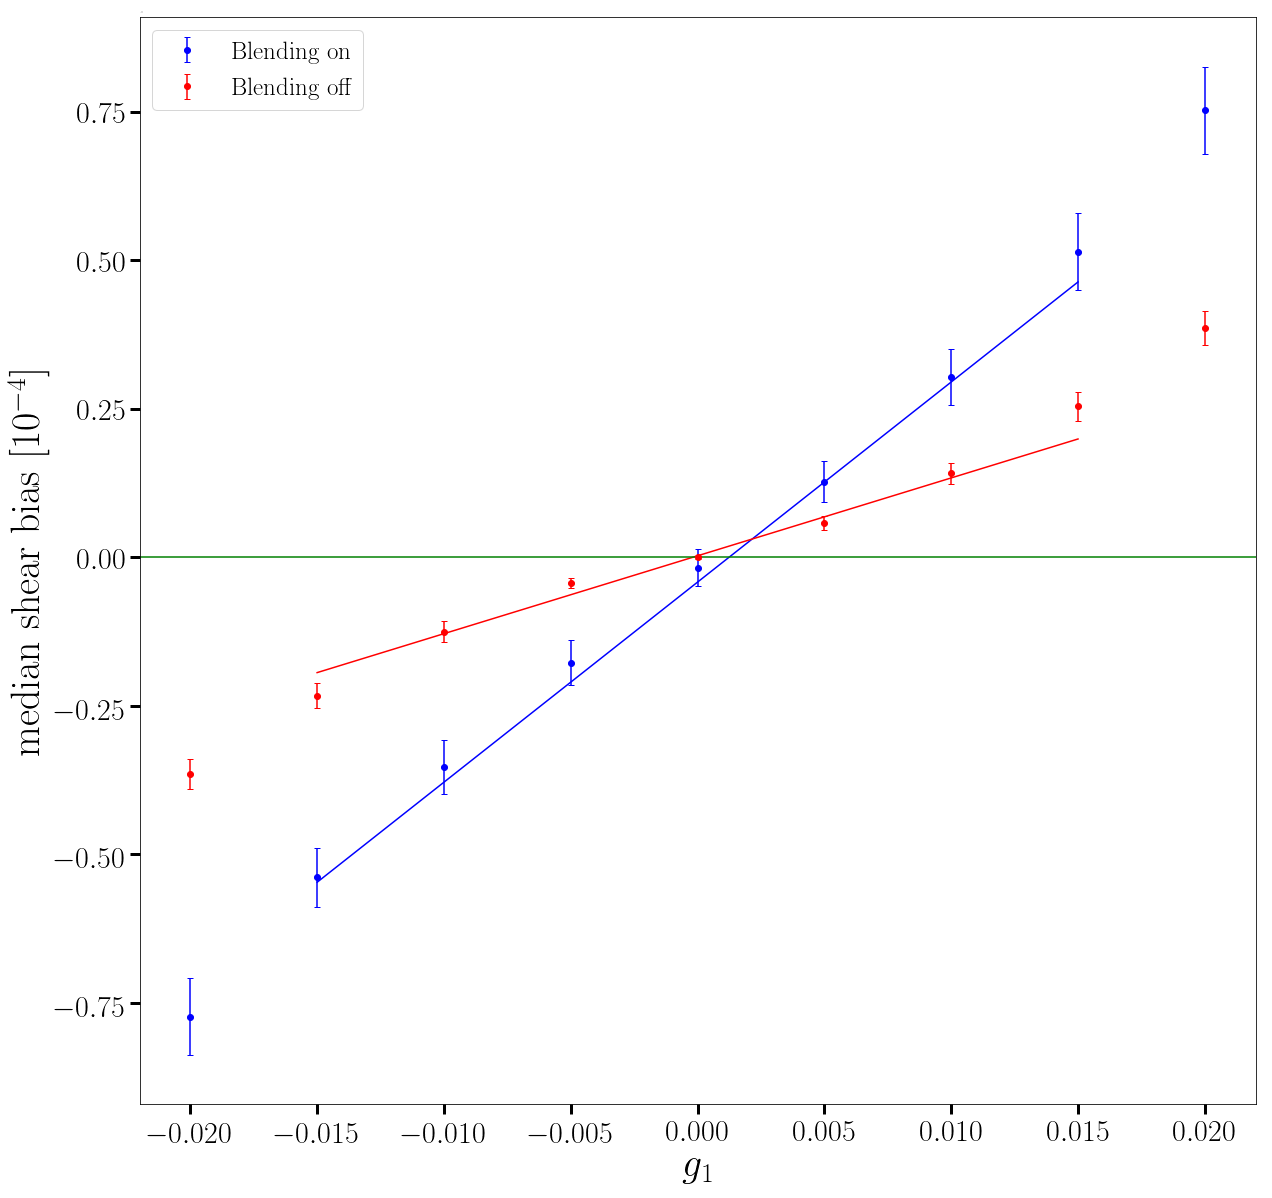

In [60]:
small_get_money_plot(g1s, 'g1', errs_LSST_grp, errs_LSST_iso,scats,errors.chi_sq_fit,{'cov_iso':boot_covariance_matrix[3:-3,3:-3], 
             'cov_grp':boot_covariance_matrix_grp[3:-3,3:-3],'inv_iso':None,'inv_grp':None, 
              'model':errors.linear_f}, labely1='median shear bias $[10^{-4}]$')

In [49]:
len(errs_LSST_grp)

9

### Money plot with ALL points fitting to a cubic 

In [11]:
%run /nfs/slac/g/ki/ki19/deuce/AEGIS/ismael/WeakLensingDeblending/mycode/preamble.py
%run /nfs/slac/g/ki/ki19/deuce/AEGIS/ismael/WeakLensingDeblending/mycode/errors.py

In [12]:
new_main_catsLSST = []  
for key in files:
    results = fits.open(files[key])
    new_main_catsLSST.append(not_bad(get_non_duplicated_cat(Table.read(results,hdu=1)))) #assume not many objects are duplicated/bad.
    print('reading {}'.format(key))

reading final_fitsLSST1
reading final_fitsLSST2
reading final_fitsLSST3
reading final_fitsLSST4
reading final_fitsLSST5
reading final_fitsLSST6
reading final_fitsLSST7
reading final_fitsLSST8
reading final_fitsLSST9
reading final_fitsLSST10
reading final_fitsLSST11
reading final_fitsLSST12
reading final_fitsLSST13


In [13]:
main_catsLSST = new_main_catsLSST[2:-2]

In [71]:
new_g1s = [-.1, -.05, -.02,-.015,-.01,-.005,0.,.005,.01,.015,.02, .05, .1]

In [74]:
filters = [good,best]

In [75]:
zero_shear_cat = new_main_catsLSST[6]

In [77]:
new_selection_cats = selection_filter(new_main_catsLSST, filters, zero_shear_cat)

In [78]:
new_errs_LSST_grp = errors.errs_param_boot(new_selection_cats,'bias_g1_grp',10000, np.median) 
new_errs_LSST_iso = errors.errs_param_boot(new_selection_cats,'bias_g1',10000, np.median) 

just to check that symmetry is respected print both percentiles: [2.03644158e-05 1.94130698e-05]
just to check that symmetry is respected print both percentiles: [1.04705943e-05 1.27401436e-05]
just to check that symmetry is respected print both percentiles: [5.99988562e-06 6.42662053e-06]
just to check that symmetry is respected print both percentiles: [5.82888606e-06 4.90130333e-06]
just to check that symmetry is respected print both percentiles: [4.81100142e-06 4.60503594e-06]
just to check that symmetry is respected print both percentiles: [4.48291212e-06 3.43705837e-06]
just to check that symmetry is respected print both percentiles: [3.20460231e-06 2.99268072e-06]
just to check that symmetry is respected print both percentiles: [3.70754231e-06 3.43319425e-06]
just to check that symmetry is respected print both percentiles: [4.44089164e-06 4.78409493e-06]
just to check that symmetry is respected print both percentiles: [5.57334351e-06 6.52590650e-06]
just to check that symmetry is

Results for fits of blended case: 

means grp: [-0.017044988, -0.013322078, -0.0057424293, -0.015945015, -0.00020379777, -0.00807536, 0.000105357394, -0.017811732, -0.011525031, -0.0097390255, -0.0030924403, 0.00516997, 0.017636586]

medians grp: [-0.0007350175, -0.00026475106, -7.7531164e-05, -5.4023694e-05, -3.544843e-05, -1.7771466e-05, -1.8168521e-06, 1.27068715e-05, 3.023991e-05, 5.144745e-05, 7.539364e-05, 0.00025615311, 0.00072131725]

sigmas grp: [0.0067739394, 0.006467907, 0.0063083917, 0.0062772036, 0.0062571517, 0.0062462175, 0.006241205, 0.006242632, 0.0062538777, 0.0062813675, 0.0063077076, 0.00648613, 0.0067780623]

errs grp: [1.941306982189417e-05, 1.2740143574774265e-05, 6.426620529964566e-06, 4.901303327642381e-06, 4.605035937856885e-06, 3.437058367126156e-06, 2.9926807201263728e-06, 3.433194251556415e-06, 4.7840949264355e-06, 6.525906501337884e-06, 7.209535397123545e-06, 1.2351723853498697e-05, 1.7592392396181822e-05]


value b0:     4.486e-01
error b0:     7.777e-05


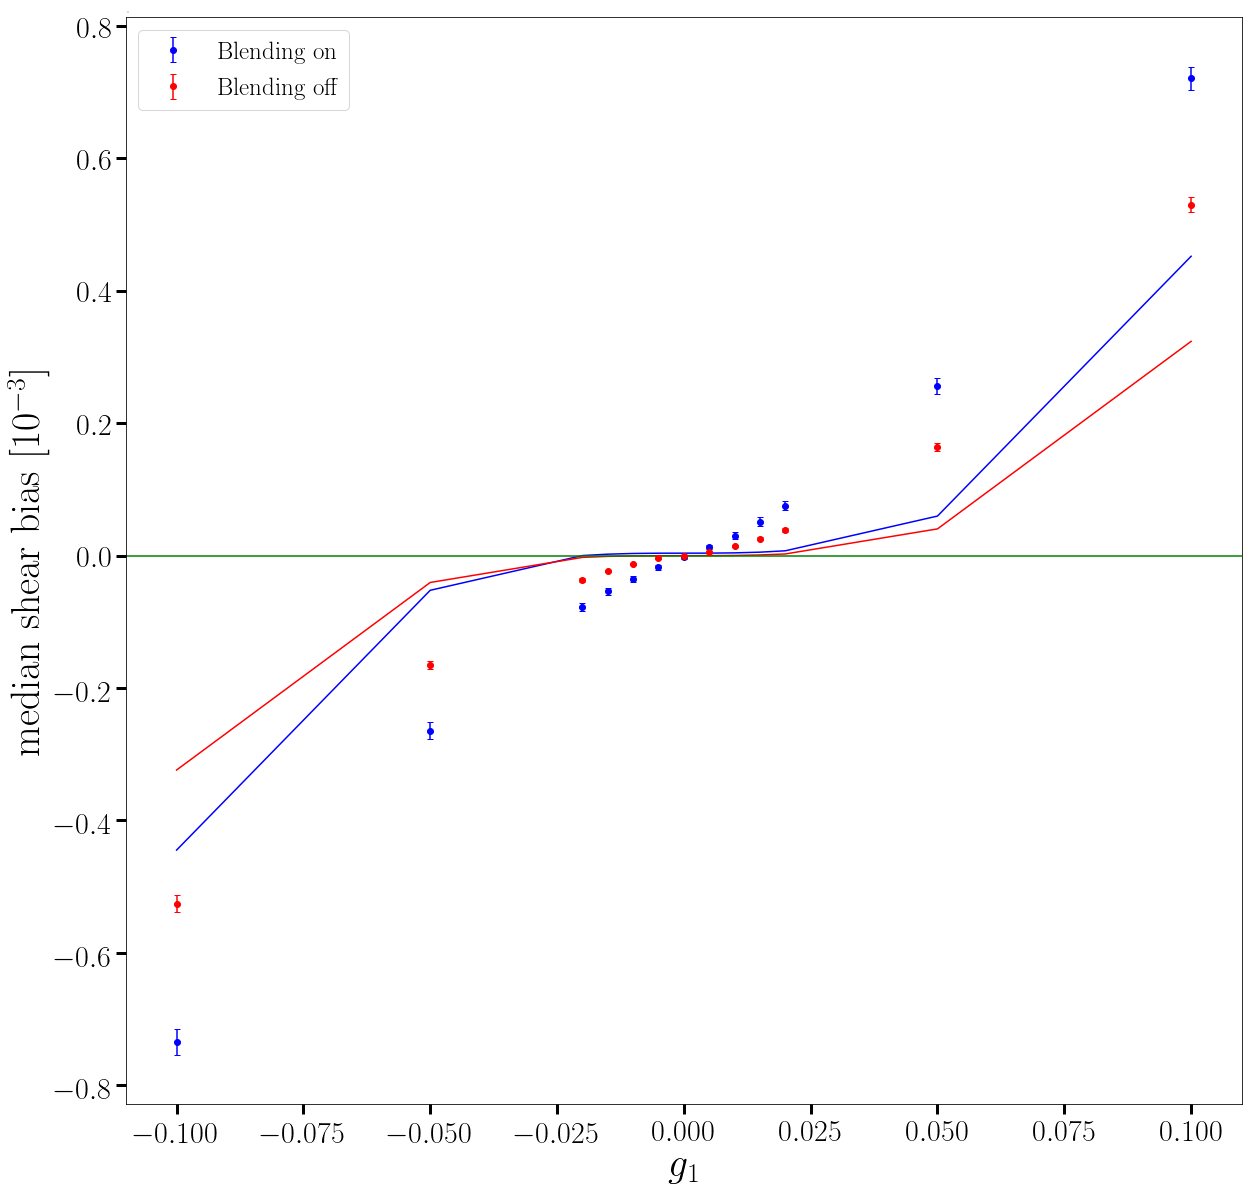

In [100]:
errors.get_money_plot(new_g1s, 'g1', new_errs_LSST_grp, new_errs_LSST_iso,new_selection_cats,errors.chi_sq_fit,{'cov_iso':boot_covariance_matrix, 
             'cov_grp':boot_covariance_matrix_grp,'inv_iso':None,'inv_grp':None, 
              'model':errors.cubic_f},labely1='median shear bias $[10^{-3}]$')

#, labely1='median shear bias $[10^{-4}]$'

## Final tomographic results for n = 5373 

In [7]:
import scipy.odr

def glinear_fit(x,y,yerrs):
    linear = scipy.odr.Model(errors.linear_f_odr)
    mydata = scipy.odr.RealData(x, y, sy=yerrs)
    myodr = scipy.odr.ODR(mydata, linear,beta0=[1.,2.])
    myoutput = myodr.run()
    #myoutput.pprint()
    beta0 = myoutput.beta[0]
    beta1 = myoutput.beta[1]
    
    return beta0, beta1, np.sqrt(myoutput.cov_beta[0,0]), np.sqrt(myoutput.cov_beta[1,1]), myoutput.cov_beta[0,1]/np.sqrt(myoutput.cov_beta[0,0]*myoutput.cov_beta[1,1])


def semi_glinear_fit(x,y,yerrs):
    linear = scipy.odr.Model(errors.semilinear_f_odr)
    mydata = scipy.odr.RealData(x, y, sy=yerrs)
    myodr = scipy.odr.ODR(mydata, linear,beta0=[1.])
    myoutput = myodr.run()
    #myoutput.pprint()
    beta0 = myoutput.beta[0]
    
    return beta0, np.sqrt(myoutput.cov_beta[0,0])





In [8]:
num_boots = 5373
tomos = np.linspace(0.2, 1.2, 6)

In [9]:
tomos

array([0.2, 0.4, 0.6, 0.8, 1. , 1.2])

In [10]:
project_dir = 'mycode/tomo/project1'

In [11]:
tomo_cats = pickle.load(open('mycode/tomo/project1/tomo_cats.p','rb'), encoding='latin1')

In [12]:
[len(cats[4]) for cats in tomo_cats]

[9455, 14948, 16034, 14976, 13378, 48389]

In [13]:
#load original results 
tomo_errs, tomo_bootstrap_matrices, tomo_ms = tomo_fncs.load_tomos(project_dir)

In [14]:
tomo_ms_iso, tomo_ms_errs_iso, tomo_ms_grp, tomo_ms_errs_grp = tomo_ms 


zmax: 1.1
m0 (blending off): 0.00169
m_avg (blending off): 0.000765
m0 (blending on): 0.00327
m_avg (blending on): 0.00226


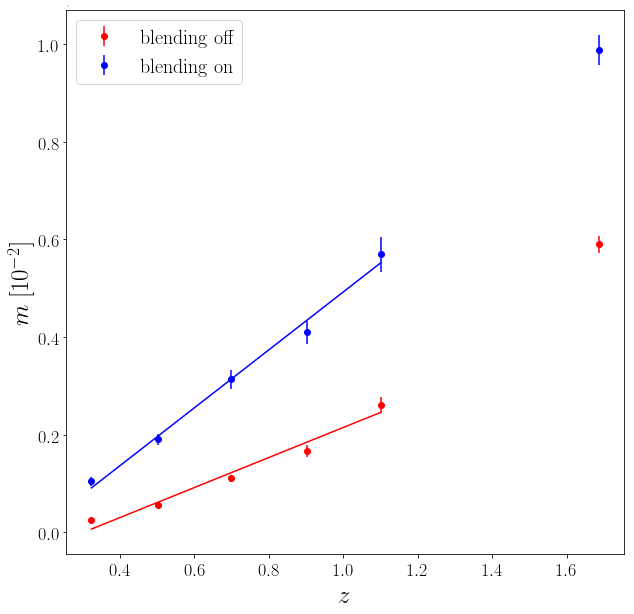

In [15]:
#in this new version (November 2, 2018) - we ignore the last point in the fit per Pat's suggestion
#and make this explicit in the plot by not plotting anything beyond that point. 
plt.rc('text',usetex=True)

fig,ax = plt.subplots(figsize=(10,10))
#x = [0.3,0.5,0.7,0.9,1.1, 1.3] #middle of each bin (except for the last one).
x = [np.median(tomo_cats[i][4]['z']) for i in range(len(tomo_cats))] #same across shears. 
ax.errorbar(x, tomo_ms_iso, yerr= tomo_ms_errs_iso,  color='r', marker='o',linestyle=' ', label= '\\rm{blending off}')
ax.errorbar(x, tomo_ms_grp, yerr=tomo_ms_errs_grp, color='b' , marker='o',linestyle= ' ', label='\\rm{blending on}')
plt.legend(loc=2, prop={'size':20}) 

zmax = np.median(tomo_cats[-2][4]['z'])

#do fit and draw the line. 
#drop the last 'overflow' bin for fitting purposes.  
beta0_iso, beta1_iso,beta0_err_iso,beta1_err_iso,beta01_corr_iso = glinear_fit(x[:-1],tomo_ms_iso[:-1],tomo_ms_errs_iso[:-1])
beta0_grp, beta1_grp,beta0_err_grp,beta1_err_grp,beta01_corr_grp = glinear_fit(x[:-1],tomo_ms_grp[:-1],tomo_ms_errs_grp[:-1])


y_line_iso= errors.get_line(x,beta0_iso,beta1_iso)
y_line_grp= errors.get_line(x,beta0_grp,beta1_grp)

#do not plot it all the way to the last bin.
ax.plot(x[:-1],y_line_iso[:-1], color='red')
ax.plot(x[:-1],y_line_grp[:-1], color='blue')


ax.set_xlabel('$z$', size=25)
ax.set_ylabel('$m \\; [10^{-2}]$', size=25)
ax.tick_params(axis='both', which='major', labelsize=18)

ax.ticklabel_format(style='sci', axis='y', scilimits=(-0, 0))
ax.get_yaxis().get_offset_text().set_size(1)

m0_iso = zmax * beta0_iso / 2 
m0_grp = zmax * beta0_grp / 2
m_avg_iso = beta1_iso + m0_iso
m_avg_grp = beta1_grp + m0_grp



print()
print(f"zmax: {zmax:.3g}")
print(f"m0 (blending off): {m0_iso:.3g}")
print(f"m_avg (blending off): {m_avg_iso:.3g}")
print(f"m0 (blending on): {m0_grp:.3g}")
print(f"m_avg (blending on): {m_avg_grp:.3g}")






In [23]:
tomo_ms_iso

[0.0002599601303981426,
 0.0005569660548470946,
 0.0011077809956607054,
 0.0016638360502035446,
 0.0026129817614199973,
 0.0058945198910100305]

In [46]:
tomo_ms_grp

[0.0010476207310946592,
 0.0019020117051156073,
 0.0031304445922458166,
 0.004093672785214046,
 0.005695759726218237,
 0.009881579124719535]

### obtain and print resulting covariance matrix. 

In [14]:
all_boot_ms_iso = pickle.load(open(os.path.join(project_dir,f'all_boot_ms_iso{num_boots}.p'),'rb'), encoding='latin1')
all_boot_ms_grp = pickle.load(open(os.path.join(project_dir,f'all_boot_ms_grp{num_boots}.p'),'rb'), encoding='latin1')


In [43]:
len(all_boot_ms_iso)

5373

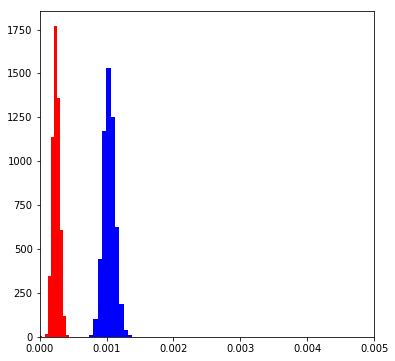

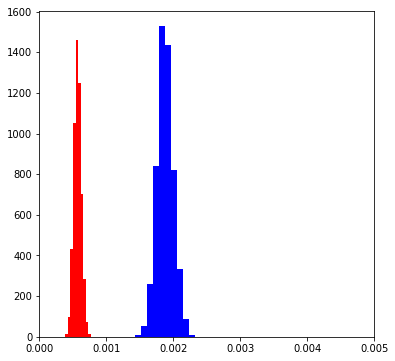

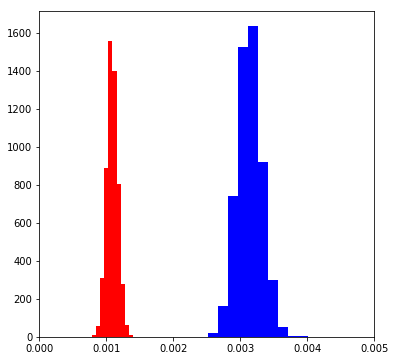

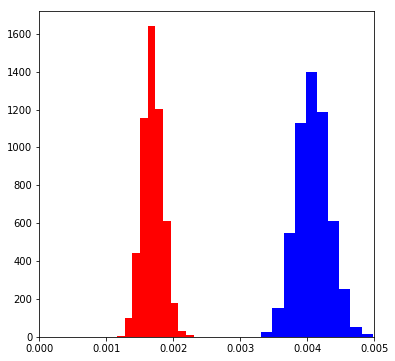

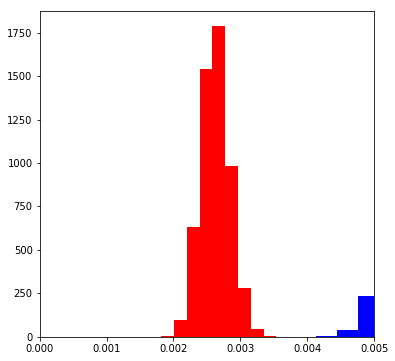

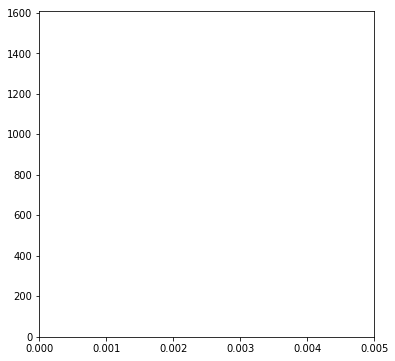

In [59]:
for i in range(len(all_boot_ms_iso)):
    fig,ax = plt.subplots(figsize=(6,6))
    ax.hist(all_boot_ms_iso[i], color='red' )
    ax.hist(all_boot_ms_grp[i], color='blue')
    ax.set_xlim([0,0.005])



In [15]:
cov_tomo_ms_iso, cov_tomo_ms_grp, corr_tomo_ms_iso, corr_tomo_ms_grp = pickle.load(open(os.path.join(project_dir,f'cov_corr_tomo_ms{num_boots}.p'),'rb'),encoding='latin1')

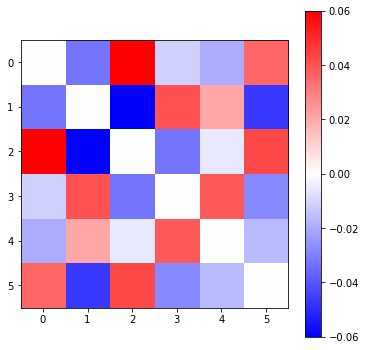

In [21]:
plt.figure(figsize=(6,6))
plt.imshow(corr_tomo_ms_iso- np.eye(6,6), cmap='bwr',vmin=-0.06, vmax=0.06)
plt.colorbar()

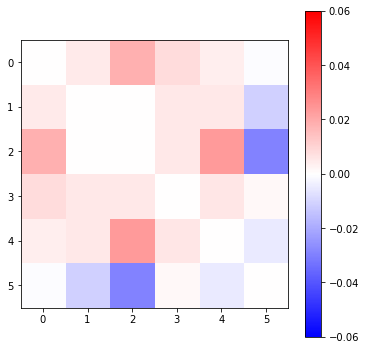

In [20]:
plt.figure(figsize=(6,6))
plt.imshow(corr_tomo_ms_grp-np.eye(6,6), cmap='bwr', vmin=-0.06, vmax=0.06)
plt.colorbar()

In [25]:
%precision 2
print(cov_tomo_ms_iso)

[[ 2.64e-09 -9.43e-11  2.76e-10 -8.83e-11 -2.16e-10  4.02e-10]
 [-9.43e-11  3.18e-09 -3.10e-10  3.51e-10  2.51e-10 -5.74e-10]
 [ 2.76e-10 -3.10e-10  6.98e-09 -4.15e-10 -1.00e-10  7.83e-10]
 [-8.83e-11  3.51e-10 -4.15e-10  2.35e-08  1.30e-09 -9.40e-10]
 [-2.16e-10  2.51e-10 -1.00e-10  1.30e-09  4.65e-08 -7.70e-10]
 [ 4.02e-10 -5.74e-10  7.83e-10 -9.40e-10 -7.70e-10  4.79e-08]]


In [26]:
%precision 2
print(cov_tomo_ms_grp)

[[ 7.63e-09  5.32e-11  2.91e-10  1.79e-10  1.25e-10 -1.75e-11]
 [ 5.32e-11  1.54e-08  5.00e-12  1.65e-10  2.46e-10 -4.37e-10]
 [ 2.91e-10  5.00e-12  3.31e-08  2.40e-10  1.60e-09 -1.69e-09]
 [ 1.79e-10  1.65e-10  2.40e-10  6.02e-08  5.42e-10  1.23e-10]
 [ 1.25e-10  2.46e-10  1.60e-09  5.42e-10  1.40e-07 -5.62e-10]
 [-1.75e-11 -4.37e-10 -1.69e-09  1.23e-10 -5.62e-10  1.01e-07]]


### Plots of snr,size vs. z of galaxies 

In [16]:
tomos

array([0.2, 0.4, 0.6, 0.8, 1. , 1.2])

In [21]:
tomo_cats = pickle.load(open('mycode/tomo/project1/tomo_cats.p', 'rb') ,encoding='latin1')

In [37]:
def binning_helper(tomos,tomo_cats, param):
    x = [np.median(tomo_cats[i][4]['z']) for i in range(len(tomo_cats))]
    y =  [np.median(tomo_cats[i][4][param]) for i in range(len(tomo_cats))]
    xerrs1 = [] 
    xerrs2 = [] 
    yerrs1 = [] 
    yerrs2 = [] 
    
    for i in range(len(tomo_cats)):
        if i != len(tomo_cats) - 1: 
            xerrs1.append(x[i] - tomos[i])
            xerrs2.append(tomos[i+1] - x[i])
        
        yerrs1.append(y[i] - np.percentile(tomo_cats[i][4][param], 25) )
        yerrs2.append(np.percentile(tomo_cats[i][4][param], 75) - y[i] )
    
    #add the last overflow bin. 
    xerrs1.append(x[-1] - tomos[-1])
    xerrs2.append(4)
    
    
    
    
    return x, y , [xerrs1, xerrs2], [yerrs1, yerrs2]

[0.3234096, 0.50235415, 0.69693136, 0.90148103, 1.1009159, 1.6852863] [23.924227, 22.206345, 20.331875, 18.06083, 15.753498, 11.992664] [[0.12340958714485167, 0.1023541450500488, 0.09693136215209952, 0.10148103237152095, 0.10091590881347656, 0.48528628349304204], [0.07659041285514834, 0.09764585494995126, 0.10306863784790044, 0.098518967628479, 0.0990840911865234, 4]] [[12.686127185821533, 11.486512422561646, 9.799906730651855, 8.10780119895935, 6.239338159561157, 3.682419776916504], [50.70392036437988, 38.14655113220215, 28.727018356323242, 21.1729793548584, 15.60769271850586, 8.594404220581055]]


<ErrorbarContainer object of 3 artists>

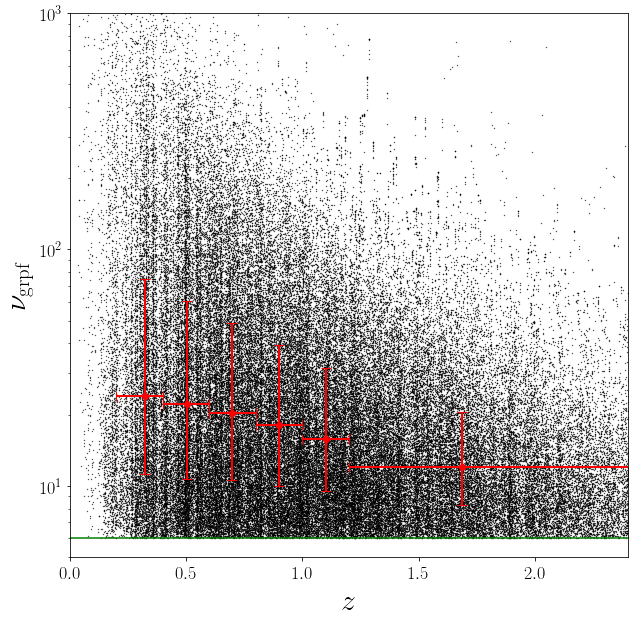

In [41]:
plt.rc('text',usetex=True)
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(scat[4]['z'],scat[4]['snr_grpf'], color='k', s=0.1)
ax.set_xlim(0,2.4)
ax.set_ylim(np.min(scat[4]['snr_grpf'])-1,10**3)
ax.set_yscale('log')

ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_xlabel('$z$',size=30)
ax.set_ylabel('$\\nu_{\\rm{grpf}}$',size=30)
ax.axhline(6,c='g')
#ax.set_title('\\rm{Not unrecognized blended and detectable lensing sample galaxies with zero shear }',size=16)

x, y , xerrs, yerrs = binning_helper(tomos,tomo_cats,'snr_grpf')
print(x, y , xerrs, yerrs)

ax.errorbar(x, y, xerr=xerrs, yerr=yerrs, color='red', fmt='o',capsize=5,ecolor='r', elinewidth=2)

<ErrorbarContainer object of 3 artists>

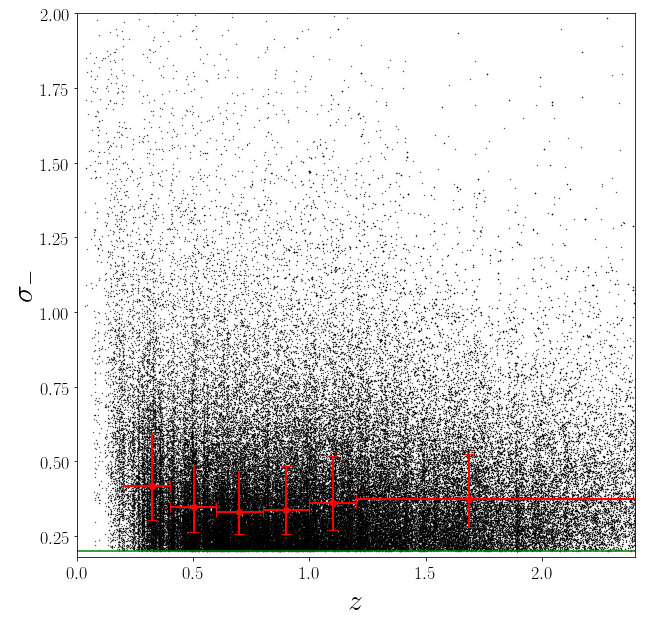

In [46]:
plt.rc('text',usetex=True)
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(scat[4]['z'],scat[4]['sigma_m'], s = 0.1, color='k')
ax.set_xlim(0,2.4)
ax.set_ylim(0.18,2)
ax.axhline(0.2, c = 'g')

ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_ylabel('$\\sigma_{-}$',size=30)
ax.set_xlabel('$z$',size=30)
# ax.set_title('\\rm{Not unrecognized blends and detectable lensing sample galaxies with zero shear }',size=16)

x, y , xerrs, yerrs = binning_helper(tomos,tomo_cats,'sigma_m')

ax.errorbar(x, y, xerr=xerrs, yerr=yerrs, color='red', fmt='o',capsize=5,ecolor='r', elinewidth=2)

In [14]:
tomos

NameError: name 'tomos' is not defined

### Are the median of size increasing because of a selection effect? 

In [47]:
main_tomo_cats = tomo_fncs.get_tomographic_cats(main_catsLSST, tomos)

<ErrorbarContainer object of 3 artists>

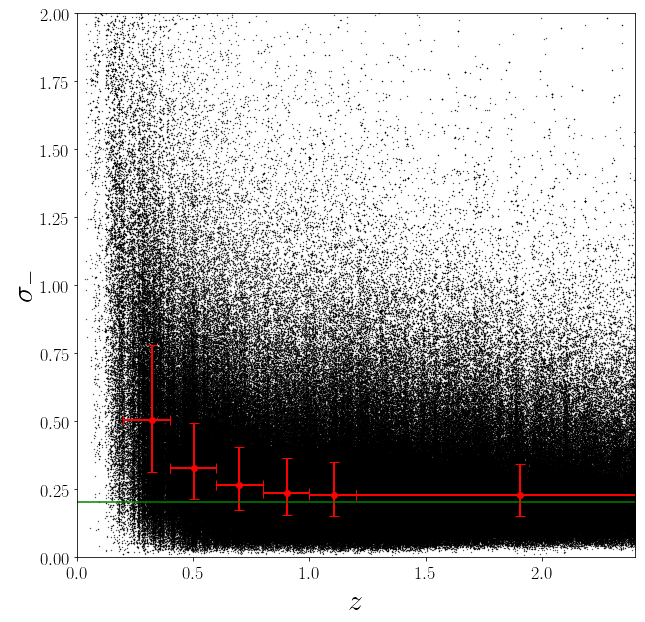

In [49]:
plt.rc('text',usetex=True)
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(main_catsLSST[4]['z'],main_catsLSST[4]['sigma_m'], s = 0.1, color='k')
ax.set_xlim(0,2.4)
ax.set_ylim(0,2)
ax.axhline(0.2, c = 'g')

ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_ylabel('$\\sigma_{-}$',size=30)
ax.set_xlabel('$z$',size=30)
# ax.set_title('\\rm{Not unrecognized blends and detectable lensing sample galaxies with zero shear }',size=16)

x, y , xerrs, yerrs = binning_helper(tomos,main_tomo_cats,'sigma_m')

ax.errorbar(x, y, xerr=xerrs, yerr=yerrs, color='red', fmt='o',capsize=5,ecolor='r', elinewidth=2)

### What happens using the (wrong) parametrization in the SRD


zmax: 1.101
m0 (blending off): 0.001118
m0 (blending on): 0.00261


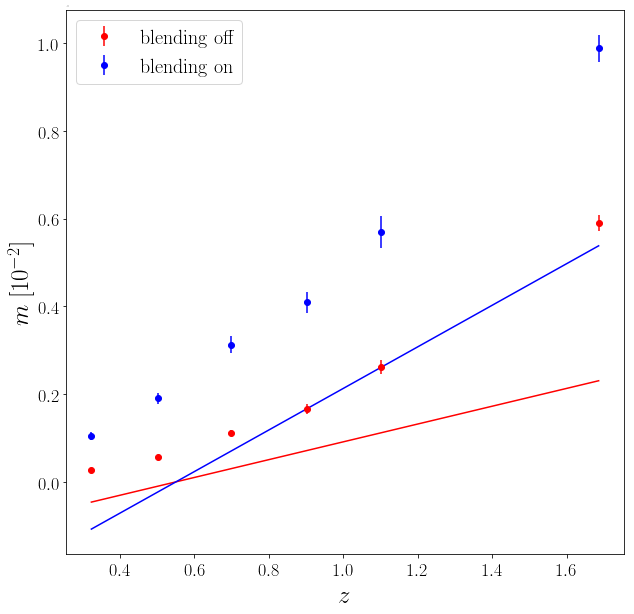

In [36]:
plt.rc('text',usetex=True)

fig,ax = plt.subplots(figsize=(10,10))
#x = [0.3,0.5,0.7,0.9,1.1, 1.3] #middle of each bin (except for the last one).
x = [np.median(tomo_cats[i][4]['z']) for i in range(len(tomo_cats))]
ax.errorbar(x, tomo_ms_iso, yerr= tomo_ms_errs_iso,  color='r', marker='o',linestyle=' ', label= '\\rm{blending off}')
ax.errorbar(x, tomo_ms_grp, yerr=tomo_ms_errs_grp, color='b' , marker='o',linestyle= ' ', label='\\rm{blending on}')
plt.legend(loc=2, prop={'size':20}) 

#do fit and draw the line. 
#drop the last 'overflow' bin for fitting purposes.  
beta0_iso,beta0_err_iso = semi_glinear_fit(x[:-1],tomo_ms_iso[:-1],tomo_ms_errs_iso[:-1])
beta0_grp,beta0_err_grp = semi_glinear_fit(x[:-1],tomo_ms_grp[:-1],tomo_ms_errs_grp[:-1])

zmax = np.median(tomo_cats[-2][4]['z'])
b_iso = - zmax * beta0_iso / 2 
b_grp = - zmax * beta0_grp / 2 



y_line_iso= errors.get_line(x,beta0_iso,b_iso)
y_line_grp= errors.get_line(x,beta0_grp,b_grp)


ax.plot(x,y_line_iso, color='red')
ax.plot(x,y_line_grp, color='blue')


ax.set_xlabel('$z$', size=25)
ax.set_ylabel('$m \\; [10^{-2}]$', size=25)
ax.tick_params(axis='both', which='major', labelsize=18)

ax.ticklabel_format(style='sci', axis='y', scilimits=(-0, 0))
ax.get_yaxis().get_offset_text().set_size(1)

m0_iso = zmax * beta0_iso / 2 
m0_grp = zmax * beta0_grp / 2
m_avg_iso = beta1_iso + m0_iso
m_avg_grp = beta1_grp + m0_grp



print()
print(f"zmax: {zmax:.4g}")
print(f"m0 (blending off): {m0_iso:.4g}")
print(f"m0 (blending on): {m0_grp:.4g}")


